In [2]:
import cv2 

In [3]:
import matplotlib.pyplot as plt

In [4]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt' #consisits of all the data (used for object detection)
frozen_model = 'frozen_inference_graph.pb' #hence it reduces the functions used

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file) #api for object detection

In [6]:
classLables = [] #empty list of python 80 objects found
file_name= 'Lables.txt'  #file_name will have the file name
with open(file_name,'rt') as fpt:
    classLables = fpt.read().rstrip('\n').split('\n')
    #classLables.append(fpt.read())

In [7]:
print(classLables) #used to print all thats stored in class

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'bench', 'toothbrush']


In [8]:
print(len(classLables))

81


In [9]:
model.setInputSize(320,320)  #size of the new frame
model.setInputScale(1.0/127.5) ## 255/2=127.5 #multiplier of the frame values
model.setInputMean((127.5,127.5,127.5)) ## mobilnet => [-1,1] sets the mean value for the frame 
model.setInputSwapRB(True)  #sets the frame for all images

< cv2.dnn.Model 000002DE714AB930>

## Read an image

In [10]:
img = cv2.imread('example.jpg') #reads an image

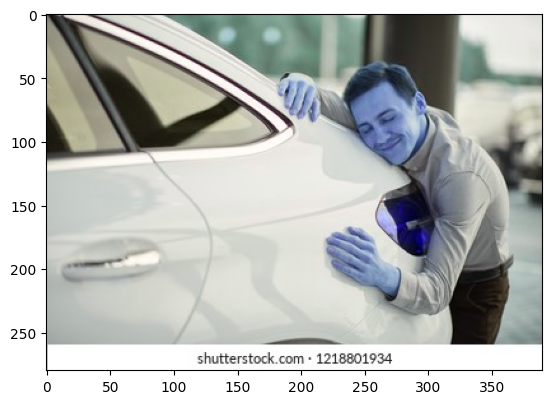

In [11]:
plt.imshow(img)

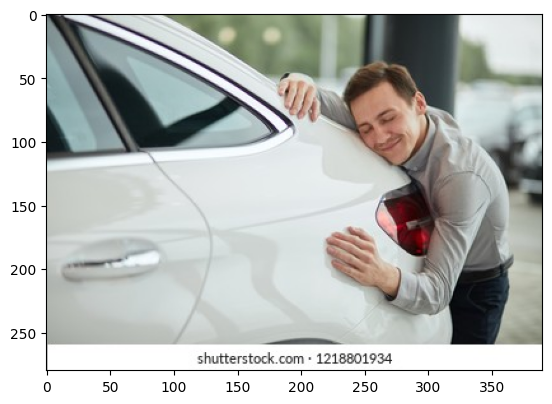

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
ClassIndex , confidece, bbox = model.detect(img, confThreshold=0.5)

In [14]:
print(ClassIndex)

[1 3 3]


In [15]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)
    cv2.rectangle(img, boxes,(255, 0, 0), 2)
    cv2.putText(img, classLables[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, fontScale = font_scale, color = (0,255,0), thickness=3)


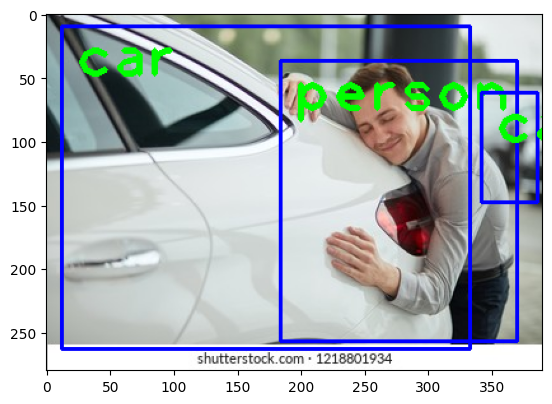

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [47]:
img = cv2.imread('example 2.jpg') #reads an image

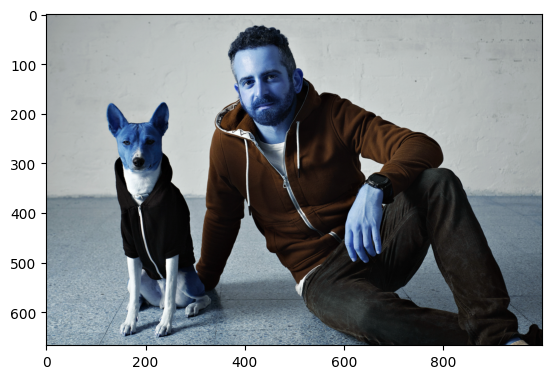

In [34]:
plt.imshow(img)

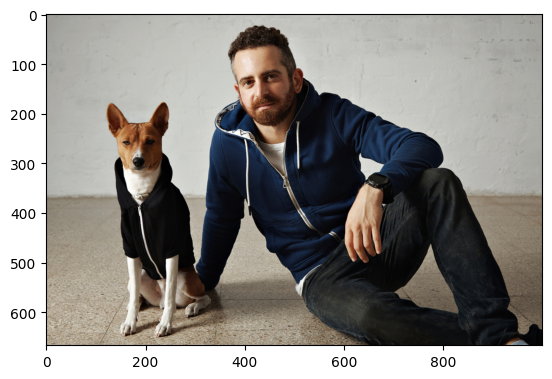

In [35]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [36]:
ClassIndex , confidece, bbox = model.detect(img, confThreshold=0.5)

In [37]:
print(ClassIndex)

[17  1 18]


In [38]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidece.flatten(), bbox):
    #cv2.rectangle(frame, (x,y),(x+w , y+h),(255,0,0),2)
    #cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale = font_scale, color = (0,0,0), thickness=1)
    cv2.rectangle(img, boxes,(255, 0, 0), 2)
    cv2.putText(img, classLables[ClassInd-1] , (boxes[0]+10,boxes[1]+40) , font, fontScale = font_scale, color = (255,0,0), thickness=1)


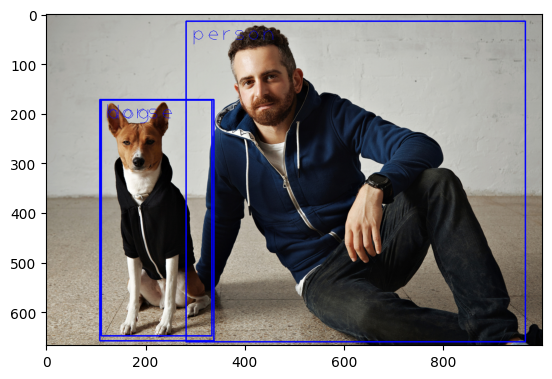

In [39]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))